#### EJERCICIO 5

El paquete gapminder contiene un fichero de datos de población, esperanza de vida y renta per cápita de los países 
del mundo entre 1952 y 2007. Instalar el paquete y llevar a cabo los siguientes gráficos:
1. Un histograma de la esperanza de vida en 2007 de los países de Europa.
2. Diagramas de cajas con las esperanzas de vida de cada continente en el año 1952.
3. Un diagrama de dispersión de la renta per cápita y la esperanza de vida de cada país en el año 2007.
4. Mejorar el gráfico anterior representando cada punto de un color diferente en función del continente al que 
    pertenece cada país y representando la renta per cápita en una escala logarítmica.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from gapminder import gapminder
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


1. Histograma de la esperanza de vida en 2007 de los países de Europa:

In [5]:
subdata1 = gapminder.loc[(gapminder['continent']=='Europe') & (gapminder['year']==2007)]
print(len(subdata1))

30


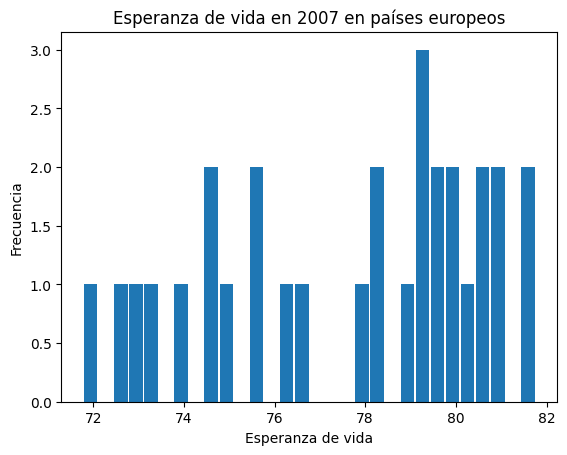

In [6]:
plt.hist(subdata1['lifeExp'],bins=30, rwidth=0.9)
plt.title("Esperanza de vida en 2007 en países europeos")
plt.xlabel("Esperanza de vida")
plt.ylabel("Frecuencia")
plt.show()

2. Diagramas de cajas con las esperanzas de vida de cada continente en el año 1952

In [7]:
subdatos2 = gapminder[gapminder['year']==1952]
datos2_por_continente_1952 = subdatos2.groupby('continent')['lifeExp'].apply(list).values.tolist()

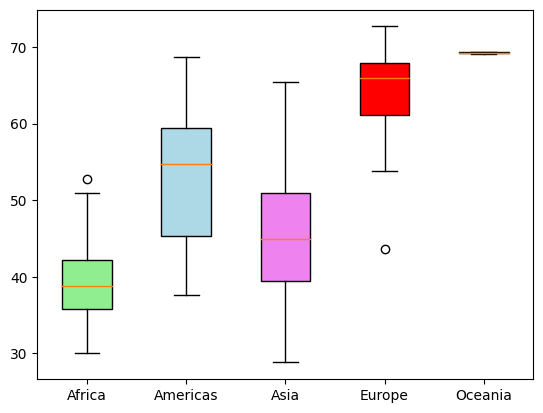

In [8]:
boxes = plt.boxplot(datos2_por_continente_1952, patch_artist= True)
colores = ["lightgreen","lightblue","violet","red","lightpink"]
for i, box in enumerate(boxes["boxes"]):
    box.set(facecolor=colores[i])
plt.xticks(range(1, len(datos2_por_continente_1952)+1), subdatos2.groupby('continent').groups.keys())
plt.show()

3. Un diagrama de dispersión de la renta per cápita y la esperanza de vida de cada país en el año 2007.
4. Mejorar el gráfico anterior representando cada punto de un color diferente en función del continente al que 
    pertenece cada país y representando la renta per cápita en una escala logarítmica.

In [9]:
subdata3 = gapminder.loc[gapminder['year']==2007]

In [10]:
fig = px.scatter(subdata3, x='gdpPercap', y='lifeExp', color='continent', hover_name='country',
                  size_max=60, range_x=[200, 60000], range_y=[20, 90],
                 title='Renta GDP per capita vs. Esperanza de vida (2007)')

fig.show() 
'''NOTA: Si no se ven los gráficos interactivos en GitHub, 
entrar en el siguiente link: https://nbviewer.org/github/AdrianaAceroFV/STAT/blob/main/Hoja%201/ejercicio-5.ipynb'''

In [11]:
fig2 = px.scatter(subdata3, x='gdpPercap', y='lifeExp', color='continent', hover_name='country',
                 log_x=True,  #escala logarítmica
                 size_max=60, range_x=[250, 60000], range_y=[20, 90],
                 title='Renta GDP per capita vs. Esperanza de vida (2007)')

fig2.show()